# Dataset Details

In [1]:
#InvoiceNo: Unique identifier for each retail invoice or transaction.
#StockCode: Code for the specific product or item being sold.
#Description: Name of the product or item being sold.
#Quantity: Number of units of the product purchased in each transaction.
#InvoiceDate: Date and time of each retail transaction.
#UnitPrice: Price per unit of the product being sold.
#CustomerID: Unique identifier for each customer who made a purchase.
#Country: Name of the country where the customer is located.

# Importing libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler

# Importing Data

In [3]:
data=pd.read_excel("Online Retail.xlsx")
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


# Datacleaning

In [5]:
data.isnull().sum()
#CustomerID=24% ...Description 0.3%

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
data.fillna(method='ffill',inplace=True)

In [7]:
num_duplicates = data.duplicated().sum()
print(num_duplicates)

5268


In [8]:
data = data.drop_duplicates()
data.duplicated().sum()

0

In [9]:
data
#541909 ---> 401604------25% has been filled

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


# Converting data

In [10]:
#replacing negative values with its abs values
data['Quantity'] = data['Quantity'].abs()

In [11]:
data['InV_Year'] = data.InvoiceDate.dt.year
data['InV_Month'] = data.InvoiceDate.dt.month
data['InV_Day'] = data.InvoiceDate.dt.day
data['WDay'] = data['InvoiceDate'].dt.weekday
weekday_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
data['WeekDay'] = data['WDay'].map(weekday_names)

In [12]:
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

In [13]:
data
#For visualisation

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InV_Year,InV_Month,InV_Day,WDay,WeekDay,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,2,Wednesday,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,2,Wednesday,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,2,Wednesday,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,2,Wednesday,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,2,Wednesday,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011,12,9,4,Friday,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,12,9,4,Friday,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,9,4,Friday,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,9,4,Friday,16.60


In [14]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'InV_Year', 'InV_Month',
       'InV_Day', 'WDay', 'WeekDay', 'TotalPrice'],
      dtype='object')

In [15]:
#country,StockCode is dropped 
df=data[[ 'Description', 'Quantity',
       'UnitPrice', 'CustomerID', 'InV_Year', 'InV_Month',
       'InV_Day', 'WDay','TotalPrice']]


# Encoding

In [20]:
data['Description'] = data['Description'].astype(str)
le=LabelEncoder()
df['Description']=le.fit_transform(data['Description'])
df.dtypes

C:\Users\DAR-F\AppData\Local\Temp\ipykernel_6656\795603029.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Description']=le.fit_transform(data['Description'])


Description      int32
Quantity         int64
UnitPrice      float64
CustomerID     float64
InV_Year         int32
InV_Month        int32
InV_Day          int32
WDay             int32
TotalPrice     float64
dtype: object

In [21]:
#data after encoding
df

,Description,Quantity,UnitPrice,CustomerID,InV_Year,InV_Month,InV_Day,WDay,TotalPrice
0,3918,6,2.55,17850.0,2010,12,1,2,15.30
1,3926,6,3.39,17850.0,2010,12,1,2,20.34
2,913,8,2.75,17850.0,2010,12,1,2,22.00
3,1910,6,3.39,17850.0,2010,12,1,2,20.34
4,2911,6,3.39,17850.0,2010,12,1,2,20.34
...,...,...,...,...,...,...,...,...,...
541904,2379,12,0.85,12680.0,2011,12,9,4,10.20
541905,743,6,2.10,12680.0,2011,12,9,4,12.60
541906,749,4,4.15,12680.0,2011,12,9,4,16.60
541907,748,4,4.15,12680.0,2011,12,9,4,16.60


In [22]:
#aim is to make it easier for modeling if not needed please delete it..!
df1 =  data.groupby('CustomerID').agg({'InvoiceDate': lambda x: (data['InvoiceDate'].max() - x.max()).days,
                                            'InvoiceNo': 'count',
                                            'TotalPrice': 'sum'})
#InvoiceDate diffirence between 1st and last purchase day.. 
#TotalPrice summation of totalprice for one customer..


In [23]:
 df1

,InvoiceDate,InvoiceNo,TotalPrice
CustomerID,,,
12346.0,325,2,154367.20
12347.0,1,182,4310.00
12348.0,74,206,3366.27
12349.0,18,73,1757.55
12350.0,309,17,334.40
...,...,...,...
18280.0,277,325,8330.57
18281.0,180,7,80.82
18282.0,7,13,179.50


# Outliers

InvoiceDate       Axes(0.125,0.867124;0.0129599x0.0128763)
InvoiceNo      Axes(0.140552,0.867124;0.0129599x0.0128763)
TotalPrice     Axes(0.156104,0.867124;0.0129599x0.0128763)
dtype: object

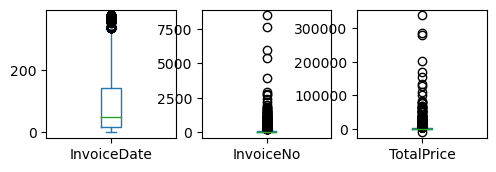

In [24]:
 df1.plot(kind="box", subplots=True, figsize=(100,100), layout=(50,50))

Description       Axes(0.125,0.867124;0.0129599x0.0128763)
Quantity       Axes(0.140552,0.867124;0.0129599x0.0128763)
UnitPrice      Axes(0.156104,0.867124;0.0129599x0.0128763)
CustomerID     Axes(0.171656,0.867124;0.0129599x0.0128763)
InV_Year       Axes(0.187207,0.867124;0.0129599x0.0128763)
InV_Month      Axes(0.202759,0.867124;0.0129599x0.0128763)
InV_Day        Axes(0.218311,0.867124;0.0129599x0.0128763)
WDay           Axes(0.233863,0.867124;0.0129599x0.0128763)
TotalPrice     Axes(0.249415,0.867124;0.0129599x0.0128763)
dtype: object

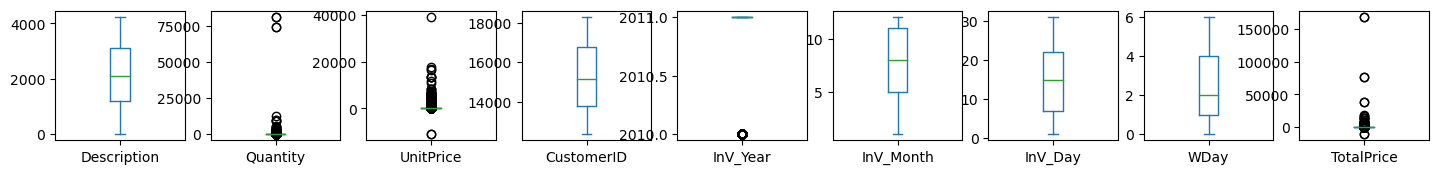

In [25]:
 df.plot(kind="box", subplots=True, figsize=(100,100), layout=(50,50))

In [26]:
for col in df1.columns:
    q1 = df1[col].quantile(0.25)
    q3 = df1[col].quantile(0.75)
    iqr = q3-q1
    upper_limit = q3 + (1.5 * iqr)
    lower_limit = q1 - (1.5 * iqr)
    df2=df1.loc[(df1[col] <= upper_limit) & (df1[col] >= lower_limit)]
    print('before removing outliers:', len(df1))
print('after removing outliers:',len(df2))
print('outliers:', len(df1)-len(df2))

before removing outliers: 4372
before removing outliers: 4372
before removing outliers: 4372
after removing outliers: 3890
outliers: 482


In [27]:
for col in df.columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    upper_limit = q3 + (1.5 * iqr)
    lower_limit = q1 - (1.5 * iqr)
    df3=data.loc[(df[col] <= upper_limit) & (df[col] >= lower_limit)]
print('before removing outliers:', len(data))
print('after removing outliers:',len(df3))
print('outliers:', len(data)-len(df3))

before removing outliers: 536641
after removing outliers: 492859
outliers: 43782
